In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


Data Collection & Preprocessing

In [7]:
#loading the data from csv file to Pandas DataFrame
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [7]:
# print first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two data frames 

In [8]:
combined_data = pd.concat([exercise, calories['Calories']], axis = 1  )

In [10]:
combined_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
# Checking on the rows and columns
combined_data.shape

(15000, 9)

In [12]:
# getting some information regarding the data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
# checking for missing values
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [14]:
# get some statisitcal measures
combined_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Visualizing the data

In [15]:
sns.set()

In [16]:
combined_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [43]:
import seaborn as sns
import pandas as pd

# encode gender column as numerical
# combined_data['Gender'] = pd.Categorical(combined_data['Gender'])
# combined_data['Gender'] = combined_data['Gender'].cat.codes

# # plot the count of each gender
# sns.countplot(combined_data['Gender'])
# sns.countplot(x='Gender', data=calories, order=['male', 'female'])
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


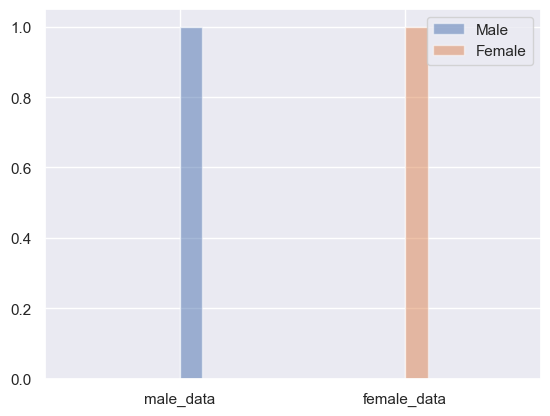

In [58]:
male_data = exercise[exercise['Gender'] == 'male']
female_data = exercise[exercise['Gender'] == 'female']

plt.hist(['male_data'], alpha=0.5, label='Male')
plt.hist(['female_data'], alpha=0.5, label='Female')
plt.legend(loc='upper right')
plt.show()



<AxesSubplot: ylabel='count'>

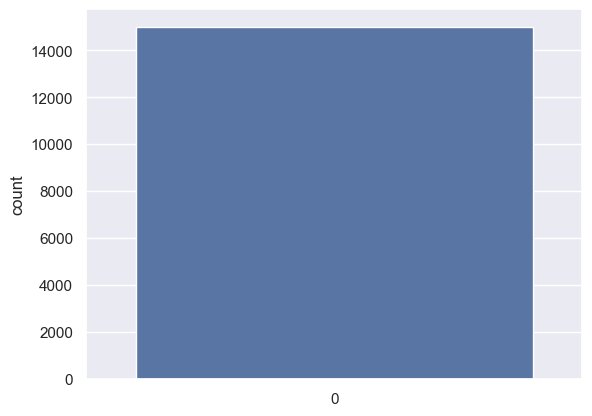

In [44]:
sns.countplot(combined_data['Gender'])

In [19]:
import pandas as pd

# create a dataframe with a column containing categorical values
df = pd.DataFrame({'age': [25, 30, 35], 'gender': ['male', 'female', 'male']})

# perform one-hot encoding on the "gender" column
df = pd.concat([df, pd.get_dummies(df['gender'], prefix='gender')], axis=1)
df.drop(['gender'], axis=1, inplace=True)

# convert the resulting columns to float data type
df[['gender_female', 'gender_male']] = df[['gender_female', 'gender_male']].astype(float)




In [45]:
combined_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [46]:
calories = pd.read_csv('calories.csv')

In [47]:
calories.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


C:\Users\Avane\AppData\Local\Temp\ipykernel_8876\4063445502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

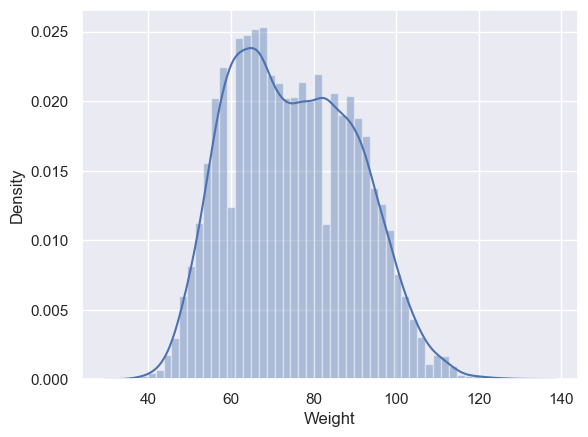

In [22]:
sns.distplot(combined_data['Weight'])

C:\Users\Avane\AppData\Local\Temp\ipykernel_8876\2418228285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

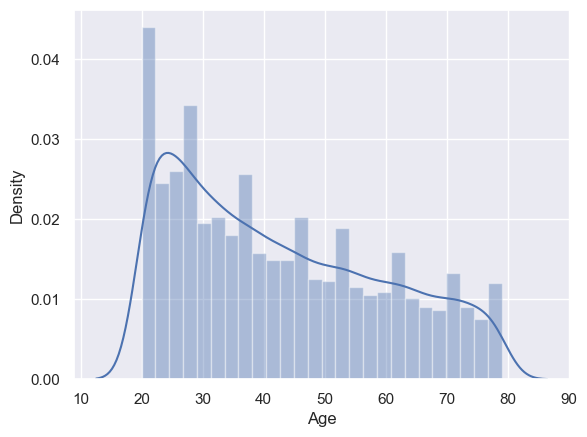

In [23]:
sns.distplot(combined_data['Age'])

C:\Users\Avane\AppData\Local\Temp\ipykernel_8876\1537266175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Height'])


<AxesSubplot: xlabel='Height', ylabel='Density'>

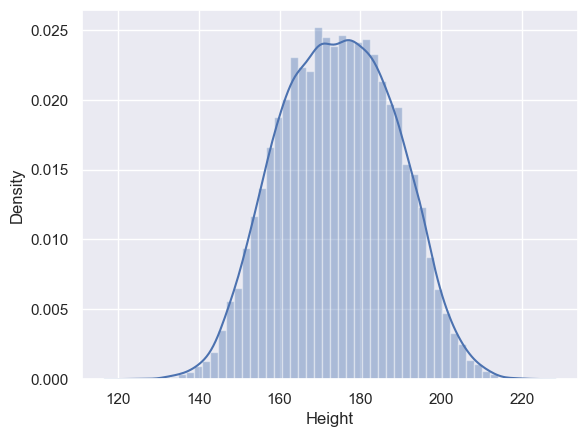

In [24]:
sns.distplot(combined_data['Height'])

C:\Users\Avane\AppData\Local\Temp\ipykernel_8876\390075107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Duration'])


<AxesSubplot: xlabel='Duration', ylabel='Density'>

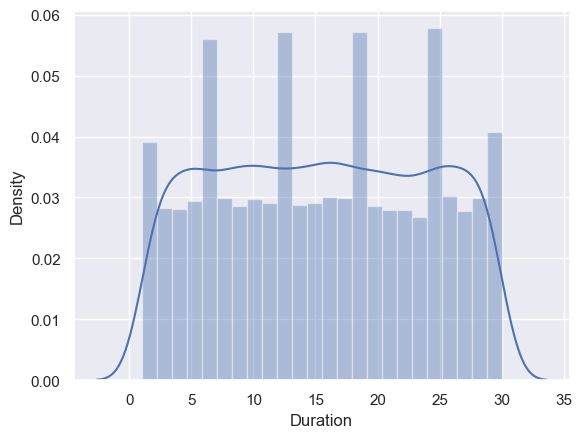

In [25]:
sns.distplot(combined_data['Duration'])

Finding the correlation of the data:
1. Positive correlation: When values of both the columns simultaneously increase
2. Negative correlation: When values of both the columns change in opposite manner

In [26]:
correlation = combined_data.corr()

C:\Users\Avane\AppData\Local\Temp\ipykernel_8876\2149058790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = combined_data.corr()


Construct a heatmap to visualize the correlation

<AxesSubplot: >

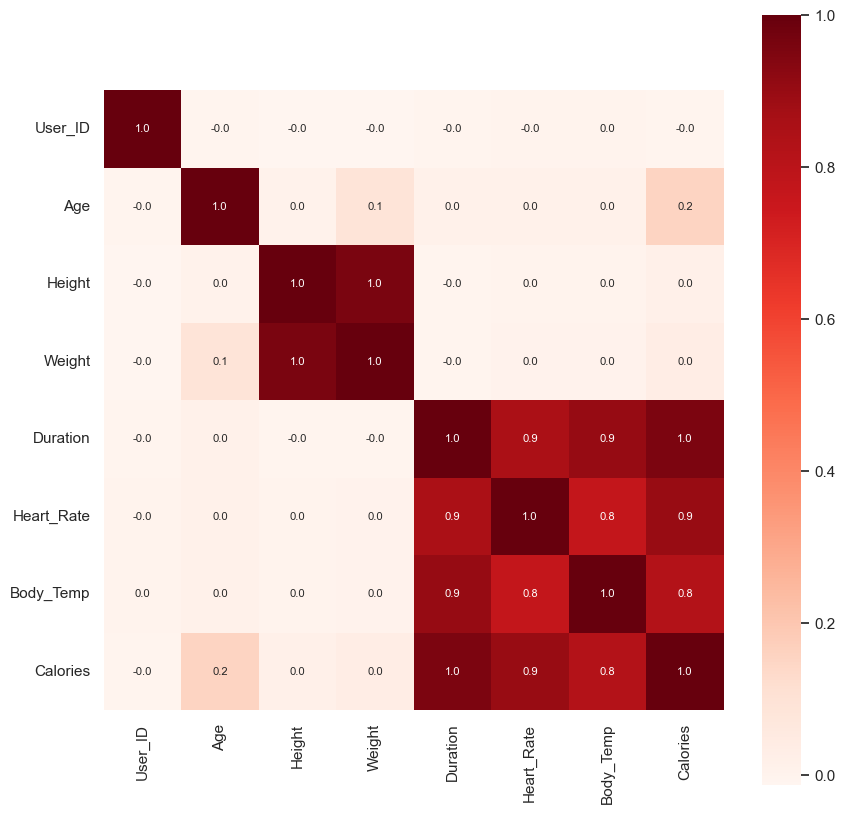

In [27]:
plt.figure(figsize=(10,10))

sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws = {'size':8}, cmap='Reds')

Converting the text data to numerical values

In [28]:
combined_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [42]:
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [49]:
combined_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Splitting into Train and Test

In [52]:
 X = combined_data.iloc[:,1:8]

In [51]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4
14996,female,27,165.0,65.0,6.0,85.0,39.2
14997,female,43,159.0,58.0,16.0,90.0,40.1
14998,male,78,193.0,97.0,2.0,84.0,38.3


In [34]:
Y = combined_data['Calories']

In [35]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

Splitting the data into training and testing

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [54]:
print(f"Shape of X = {X.shape}\nShape of X_train = {X_train.shape}\nShape of X_test = {X_test.shape}", end="")


Shape of X = (15000, 7)
Shape of X_train = (12000, 7)
Shape of X_test = (3000, 7)

Performing feature scaling or normalization on the dataset to improve model performance.

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model Training

XGBoost Regressor

In [60]:
model = XGBRegressor()

In [61]:
# training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("R-squared score of the model on training set:", r2_score(Y_train, y_train_pred))
print("R-squared score of the model on testing set:", r2_score(Y_test, y_test_pred))
print("Mean Squared Error of the model on testing set:", mean_squared_error(Y_test, y_test_pred))


R-squared score of the model on training set: 0.9995517443430838
R-squared score of the model on testing set: 0.9988453127264426
Mean Squared Error of the model on testing set: 4.5351909574465745


In [65]:
print(X_test.shape)
print(Y_test.shape)



(3000, 7)
(3000,)


In [68]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_


Evaluation

Prediction

In [69]:
test_data_prediction = model.predict(X_test)

In [70]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


Mean Absolute Error

In [71]:
max = metrics.mean_absolute_error(Y_test, test_data_prediction)

Magnitude of error

In [79]:
print("Mean Absolute Error:",max.round(4))

Mean Absolute Error: 1.4805
